## 0. Import Libraries

In [2]:
from shapely.geometry import mapping
from cartopy.feature import ShapelyFeature
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap

import xarray as xr
import numpy as np
import geopandas as gpd
import pandas as pd
import cartopy.io.shapereader as shpreader 
import matplotlib.pyplot as plt

import cartopy
import utils
import proplot
import matplotlib

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. General Options

In [4]:
# bias algorithm
bias_algo = 'QDM'
season = 'JJA' # DJF or JJA

# general data path
path_general = fr'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data'

# variable name
name_variable_cosmo = 'TOT_PREC'
path_save = fr'{path_general}/data/{name_variable_cosmo}/'

### 1.1 Functions

In [5]:
def return_unique_options(season, time_resample):
    
    # path for resampling information
    if time_resample != 1:
        path_resample = fr'{time_resample}hrsum'
    else:
        path_resample = fr'{time_resample}hr'
        
    return season, time_resample, path_resample

In [6]:
turkey_bool = xr.open_dataset(fr"{path_save}/cosmo/BC/vectorized_turkey.nc")

## 2. Open Index Data

### 2.1 Intensity Indices

#### 2.1.1 Reference

In [7]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'rx{time_resample}hr'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_ref = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

#### 2.1.2 Projection

In [8]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'rx{time_resample}hr'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_proj = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

### 2.2 Frequency - Percentile Indices

#### 2.2.1 Reference

In [9]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'R{time_resample}hr0.95P'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
freq_perc_idx_ref = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

#### 2.2.2 Projection

In [10]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'R{time_resample}hr0.95P'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
freq_perc_idx_proj = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

### 2.3 Frequency - Absolute Indices

#### 2.3.1 Reference

In [11]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'R{time_resample}hr{wet_hours}mm'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
freq_abs_idx_ref = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

#### 2.3.2 Projection

In [12]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'R{time_resample}hr{wet_hours}mm'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
freq_abs_idx_proj = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

### 2.4 Persistence - Percentile Indices

#### 2.4.1 Reference

In [13]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'M{time_resample}hrCW0.95P'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
pers_perc_idx_ref = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

#### 2.4.2 Projection

In [14]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'M{time_resample}hrCW0.95P'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
pers_perc_idx_proj = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

### 2.5 Persistence - Absolute Indices

#### 2.5.1 Reference

In [15]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'M{time_resample}hrCW{wet_hours}mm'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
pers_abs_idx_ref = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

#### 2.5.2 Projection

In [16]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'M{time_resample}hrCW{wet_hours}mm'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
pers_abs_idx_proj = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

## 3. Visualize

### 3.1 Options

In [37]:
# Parameters to change (plot) -------------------

# projection
lcc = utils.get_proj_info_model()

# fig features
fig_array = [[1, 2],
             [3, 4],
             [5, 6],
             [7, 8],
             [9, 10]
            ]

# graphic number
graphic_no = 10

# variable and dimension names
name_var = 'TOT_PREC'
name_lon = 'rlon'
name_lat = 'rlat'

col_names = [
    'Intensity',
    'Frequency-Percentile',
    'Frequency-Absolute',
    'Persistence-Percentile',
    'Persistence-Absolute',
]


idx_names = [fr'Rx{time_resample}hr', 
             fr'R{time_resample}hr0.95P',
             fr'R{time_resample}hr{wet_hours}mm',
             fr'M{time_resample}hrCW0.95P',
             fr'M{time_resample}hrCW{wet_hours}mm'
             ]

# CMAPS
# cmap for intensity
cmap_intensity = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:E0453D-8.6:E07F3D-17:0FF020-34:0FF0B3-50:0F85F0-75:0600BC-100:9801D9
    (0.000, (0.878, 0.271, 0.239)),
    (0.086, (0.878, 0.498, 0.239)),
    (0.170, (0.059, 0.941, 0.125)),
    (0.340, (0.059, 0.941, 0.702)),
    (0.500, (0.059, 0.522, 0.941)),
    (0.750, (0.024, 0.000, 0.737)),
    (1.000, (0.596, 0.004, 0.851))))

if season == 'DJF':
    clevs_intensity = np.arange(0, 21, 1 
                           )
elif season == 'JJA':
    clevs_intensity = np.arange(0, 41, 1 
                       )
norm_intensity = BoundaryNorm(clevs_intensity,
                    ncolors=cmap_intensity.N, 
                    clip=True
                        )

# cmap for freq perc
cmap_freq_perc = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:1F4E5A-15:029C8E-50:FFDB69-76.3:FFA658-89:EA5F40-100:9C8981
    (0.000, (0.122, 0.306, 0.353)),
    (0.150, (0.008, 0.612, 0.557)),
    (0.500, (1.000, 0.859, 0.412)),
    (0.763, (1.000, 0.651, 0.345)),
    (0.890, (0.918, 0.373, 0.251)),
    (1.000, (0.612, 0.537, 0.506)))).reversed()

if season == 'DJF':
    clevs_freq_perc = np.arange(0, 851, 50 
                           )
    ticks_freq_perc = [200, 500, 800]
elif season == 'JJA':
    clevs_freq_perc = np.arange(0, 501, 25 
                           )
    ticks_freq_perc = [0, 250, 500]
norm_freq_perc = BoundaryNorm(clevs_freq_perc,
                    ncolors=cmap_freq_perc.N, 
                    clip=True
                        )

# cmap for freq abs
cmap_freq_abs = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:1F4E5A-15:029C8E-50:FFDB69-76.3:FFA658-89:EA5F40-100:9C8981
    (0.000, (0.122, 0.306, 0.353)),
    (0.150, (0.008, 0.612, 0.557)),
    (0.500, (1.000, 0.859, 0.412)),
    (0.763, (1.000, 0.651, 0.345)),
    (0.890, (0.918, 0.373, 0.251)),
    (1.000, (0.612, 0.537, 0.506)))).reversed()

if season == 'DJF':
    clevs_freq_abs = np.arange(0, 1301, 100 
                           )
    ticks_freq_abs = [300, 800, 1300]
elif season == 'JJA':
    clevs_freq_abs = np.arange(0, 501, 25 
                           )
    ticks_freq_abs = [0, 250, 500]
norm_freq_abs = BoundaryNorm(clevs_freq_abs,
                    ncolors=cmap_freq_abs.N, 
                    clip=True
                        )

# cmap for persistence perc
cmap_pers_perc = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#020024-090979-00D4FF-BAD7DD
    (0.000, (0.008, 0.000, 0.141)),
    (0.333, (0.035, 0.035, 0.475)),
    (0.667, (0.000, 0.831, 1.000)),
    (1.000, (0.729, 0.843, 0.867)))).reversed()

clevs_pers_perc = np.arange(0, 81, 4 
                       )
norm_pers_perc = BoundaryNorm(clevs_pers_perc,
                    ncolors=cmap_pers_perc.N, 
                    clip=True
                        )

# cmap for persistence abs
cmap_pers_abs = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#020024-090979-00D4FF-BAD7DD
    (0.000, (0.008, 0.000, 0.141)),
    (0.333, (0.035, 0.035, 0.475)),
    (0.667, (0.000, 0.831, 1.000)),
    (1.000, (0.729, 0.843, 0.867)))).reversed()

if season == 'DJF':
    clevs_pers_abs = np.arange(0, 181, 9 
                           )
elif season == 'JJA':
    clevs_pers_abs = np.arange(0, 81, 4
                           )
norm_pers_abs = BoundaryNorm(clevs_pers_abs,
                    ncolors=cmap_pers_abs.N, 
                    clip=True
                        )

### 3.2 Plot

/tmp/ipykernel_976/3850877796.py:4: ProplotWarning: Ignoring unused projection-specific format() keyword argument(s): {'aspect': 10}
  fig, axs = proplot.subplots(fig_array,
/tmp/ipykernel_976/3850877796.py:174: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.set_aspect('equal')
/tmp/ipykernel_976/3850877796.py:177: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.axis('off')
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be pas

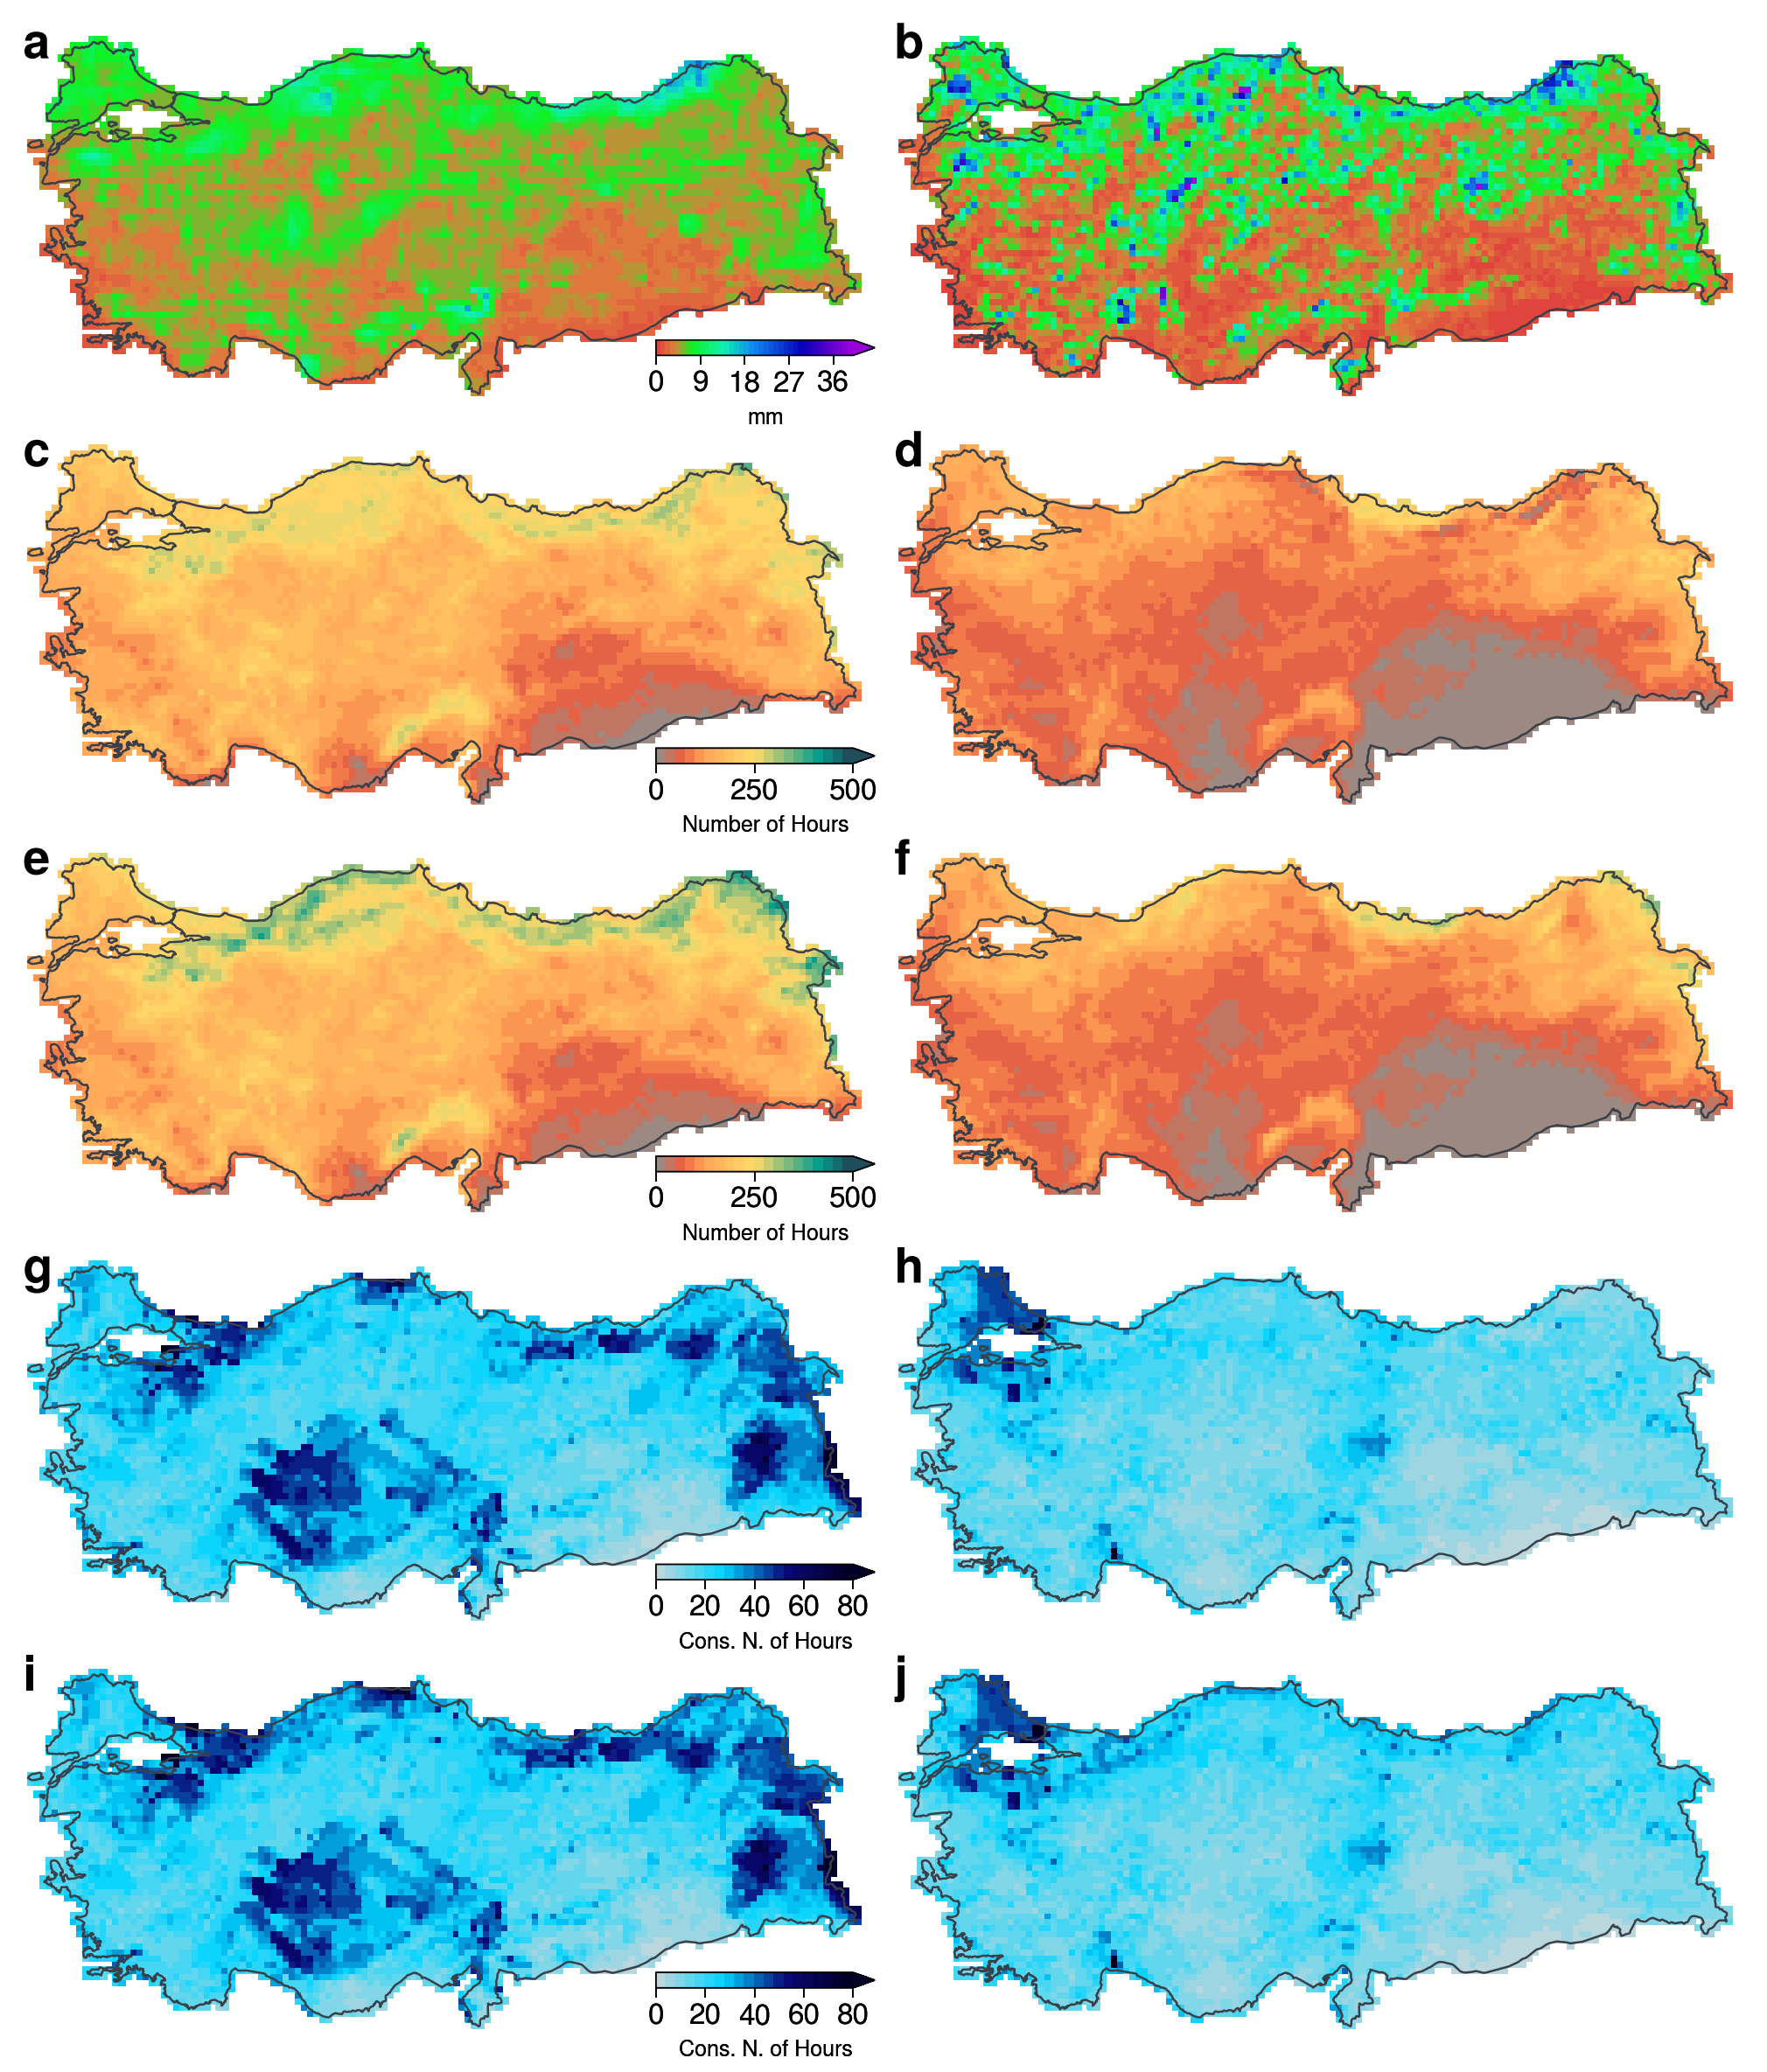

In [39]:
#%%capture

# Create Figure -------------------------
fig, axs = proplot.subplots(fig_array, 
                            aspect=10,
                            axwidth=5,
                            proj=lcc,
                            hratios=tuple(np.ones(len(fig_array), dtype=int)),
                            includepanels=True,
                            hspace=-0.46,
                            wspace=-0.16,
                            sharey=0
                           )

# format whole figure
axs.format(abcloc='ul',
           #abcbbox = True,
           abc_kw={'size':20},
           abc=True,
           zorder=50
          )

# Turkey limits
axs.format(lonlim=(25.8, 45.1), 
           latlim=(35., 42.2), 
           longrid=False, 
           latgrid = False
          )

# format headers
#axs.format(rowlabels=col_names,
#           collabels=[fr'Reference - {season}', 
#                      fr'Projection - {season}']
#          )

# geographic axes
utils.plot_geographic_features(axs, 
                               graphic_no
                              )#

# meshes a and b
for idx, dt_mesh_ab in enumerate([intensity_idx_ref, intensity_idx_proj]):
    mesh_ab = axs[idx].pcolormesh(dt_mesh_ab[name_lon],
                                  dt_mesh_ab[name_lat],
                                  dt_mesh_ab.max(dim='year'),
                                  cmap=cmap_intensity,
                                  norm=norm_intensity,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    axs[0].colorbar(mesh_ab,
                 label='mm',
                 loc='lr', length=10,  # length is em widths
                 tickminor=False, alpha=0.5,
                 width=0.7,
                 labelsize = 9,
                 ticklabelsize = 12,
                 frame=False,
                 pad = 0.5
                )
    
    # index title
    #axs[idx].format(title=idx_names[0], titleloc='ll')
    
# meshes c and d
for idx, dt_mesh_cd in enumerate([freq_perc_idx_ref, freq_perc_idx_proj]):
    mesh_cd = axs[idx+2].pcolormesh(dt_mesh_cd[name_lon],
                                  dt_mesh_cd[name_lat],
                                  dt_mesh_cd.max(dim='year'),
                                  cmap=cmap_freq_perc,
                                  norm=norm_freq_perc,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    axs[2].colorbar(mesh_cd,
                 label='Number of Hours',
                 loc='lr', length=10,  # length is em widths
                 tickminor=False, alpha=0.5,
                 width=0.7,
                 labelsize = 9,
                 ticklabelsize = 12,
                 frame=False,
                 pad = 0.5,
                 ticks=ticks_freq_perc
                )
    
    # index title
    #axs[idx+2].format(title=idx_names[1], titleloc='ll')
    
# meshes e and f
for idx, dt_mesh_ef in enumerate([freq_abs_idx_ref, freq_abs_idx_proj]):
    mesh_ef = axs[idx+4].pcolormesh(dt_mesh_ef[name_lon],
                                  dt_mesh_ef[name_lat],
                                  dt_mesh_ef.max(dim='year'),
                                  cmap=cmap_freq_abs,
                                  norm=norm_freq_abs,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    axs[4].colorbar(mesh_ef,
                 label='Number of Hours',
                 loc='lr', length=10,  # length is em widths
                 tickminor=False, alpha=0.5,
                 width=0.7,
                 labelsize = 9,
                 ticklabelsize = 12,
                 frame=False,
                 pad = 0.5,
                 ticks=ticks_freq_abs
                )
    
    # index title
    #axs[idx+4].format(title=idx_names[2], titleloc='ll')
    
# meshes g and h
for idx, dt_mesh_gh in enumerate([pers_perc_idx_ref, pers_perc_idx_proj]):
    mesh_gh = axs[idx+6].pcolormesh(dt_mesh_gh[name_lon],
                                  dt_mesh_gh[name_lat],
                                  dt_mesh_gh.max(dim='year'),
                                  cmap=cmap_pers_perc,
                                  norm=norm_pers_perc,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    axs[6].colorbar(mesh_gh,
                 label='Cons. N. of Hours',
                 loc='lr', length=10,  # length is em widths
                 tickminor=False, alpha=0.5,
                 width=0.7,
                 labelsize = 9,
                 ticklabelsize = 12,
                 frame=False,
                 pad = 0.5,
                )
    
    # index title
    #axs[idx+6].format(title=idx_names[3], titleloc='ll')
    
# meshes i and j
for idx, dt_mesh_ij in enumerate([pers_abs_idx_ref, pers_abs_idx_proj]):
    mesh_ij = axs[idx+8].pcolormesh(dt_mesh_ij[name_lon],
                                  dt_mesh_ij[name_lat],
                                  dt_mesh_ij.max(dim='year'),
                                  cmap=cmap_pers_abs,
                                  norm=norm_pers_abs,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    axs[8].colorbar(mesh_ij,
                 label='Cons. N. of Hours',
                 loc='lr', length=10,  # length is em widths
                 tickminor=False, alpha=0.5,
                 width=0.7,
                 labelsize = 9,
                 ticklabelsize = 12,
                 frame=False,
                 pad = 0.5,
                )

    # index title
    #axs[idx+8].format(title=idx_names[4], titleloc='ll')
    
# set the aspect ratio of the plot to "equal"
axs.set_aspect('equal')

fig.patch.set_visible(False)
axs.axis('off')

# set the background color of the figure to match the map
fig.set_facecolor('white')

#save figure
plt.savefig(fr'{path_general}/pictures/compare_reference_projection_indices_{season}.jpeg',
            bbox_inches='tight', optimize=True,
            progressive=True, dpi=300)